In [19]:
import numpy as np
from datetime import timedelta, datetime
import random
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Function to generate a random date within a range
def random_date(start, end):
    return start + timedelta(
        days=random.randint(0, int((end - start).days)))

# Define the start and end dates for the dataset period
start_date = datetime(2009, 1, 1)
end_date = datetime(2011, 12, 31)

In [21]:
# Sample values for categorical variables
customer_country_codes = ['USA', 'CAN', 'GBR', 'AUS', 'DEU']
product_codes = ['P001', 'P002', 'P003', 'P004', 'P005']
order_types = ['VO']
routes = ['Air', 'Sea', 'Road', 'Rail']
currencies = ['USD', 'CAD', 'GBP', 'AUD', 'EUR']

In [22]:
# Number of rows in the dataset
num_rows = 2421

# Generating the dataset
data = []
for _ in range(num_rows):
    order_date = random_date(start_date, end_date)
    delivery_date = order_date + timedelta(days=random.randint(15,180))
    country_code = random.choice(customer_country_codes)
    product_code = random.choice(product_codes)
    order_type = random.choice(order_types)
    route = random.choice(routes)
    currency = random.choice(currencies)
    value = round(random.uniform(100, 1000), 2)
    items = random.uniform(100, 1000)
    description = f"Parka - {product_code}"

    data.append([order_date, delivery_date, country_code, product_code, description,
                 order_type, f'CO-{random.randint(1000, 9999)}', value, currency, items, route])

# Creating DataFrame
df = pd.DataFrame(data, columns=['Order Date', 'Requested Delivery Date', 'Customer Country Code',
                                 'Product Code', 'Description', 'Order Type', 'Customer Order Code',
                                 'Value', 'Currency', 'Items', 'Route'])

print(df.head())  # Display the first few rows of the dataset

  Order Date Requested Delivery Date Customer Country Code Product Code  \
0 2010-02-18              2010-04-26                   CAN         P001   
1 2009-12-14              2010-02-10                   AUS         P002   
2 2010-10-18              2011-01-05                   USA         P003   
3 2009-03-03              2009-05-11                   GBR         P001   
4 2011-05-26              2011-07-24                   USA         P001   

    Description Order Type Customer Order Code   Value Currency       Items  \
0  Parka - P001         VO             CO-2515  250.86      AUD  911.357110   
1  Parka - P002         VO             CO-8272  847.53      CAD  924.914037   
2  Parka - P003         VO             CO-1875  470.65      EUR  392.259727   
3  Parka - P001         VO             CO-8516  984.41      USD  969.204430   
4  Parka - P001         VO             CO-5945  824.52      CAD  189.281543   

  Route  
0   Air  
1  Rail  
2   Sea  
3   Air  
4  Road  


In [23]:
# Convert 'Requested Delivery Date' and 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d.%m.%Y')
df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'], format='%d.%m.%Y')

# Calculate the time difference in days
df['Time Difference'] = (df['Requested Delivery Date'] - df['Order Date']).dt.days

# Add 'Fast Demand' column
df['Fast Demand'] = np.where(df['Time Difference'] > 30, 1, 0)

# Drop the temporary 'Time Difference' column if not needed
df = df.drop('Time Difference', axis=1)


In [24]:
print(df.head())

  Order Date Requested Delivery Date Customer Country Code Product Code  \
0 2010-02-18              2010-04-26                   CAN         P001   
1 2009-12-14              2010-02-10                   AUS         P002   
2 2010-10-18              2011-01-05                   USA         P003   
3 2009-03-03              2009-05-11                   GBR         P001   
4 2011-05-26              2011-07-24                   USA         P001   

    Description Order Type Customer Order Code   Value Currency       Items  \
0  Parka - P001         VO             CO-2515  250.86      AUD  911.357110   
1  Parka - P002         VO             CO-8272  847.53      CAD  924.914037   
2  Parka - P003         VO             CO-1875  470.65      EUR  392.259727   
3  Parka - P001         VO             CO-8516  984.41      USD  969.204430   
4  Parka - P001         VO             CO-5945  824.52      CAD  189.281543   

  Route  Fast Demand  
0   Air            1  
1  Rail            1  
2   S

In [25]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d.%m.%Y')
df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'],    format='%d.%m.%Y')
# Extract month and create a 'Season' column
df['DELIVERY MONTH'] = df['Requested Delivery Date'].dt.month
df['SEASON'] = df['Requested Delivery Date'].dt.month.map({1: 'Winter', 2:   'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})


In [26]:
print(df.head())

  Order Date Requested Delivery Date Customer Country Code Product Code  \
0 2010-02-18              2010-04-26                   CAN         P001   
1 2009-12-14              2010-02-10                   AUS         P002   
2 2010-10-18              2011-01-05                   USA         P003   
3 2009-03-03              2009-05-11                   GBR         P001   
4 2011-05-26              2011-07-24                   USA         P001   

    Description Order Type Customer Order Code   Value Currency       Items  \
0  Parka - P001         VO             CO-2515  250.86      AUD  911.357110   
1  Parka - P002         VO             CO-8272  847.53      CAD  924.914037   
2  Parka - P003         VO             CO-1875  470.65      EUR  392.259727   
3  Parka - P001         VO             CO-8516  984.41      USD  969.204430   
4  Parka - P001         VO             CO-5945  824.52      CAD  189.281543   

  Route  Fast Demand  DELIVERY MONTH  SEASON  
0   Air            1       

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [29]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
data = df[['Order Date', 'Fast Demand']]

In [33]:
data

,Order Date,Fast Demand
0,2010-02-18,1
1,2009-12-14,1
2,2010-10-18,1
3,2009-03-03,1
4,2011-05-26,1
...,...,...
2416,2010-07-20,1
2417,2009-06-28,1
2418,2009-03-23,1
2419,2011-01-28,1


<Axes: >

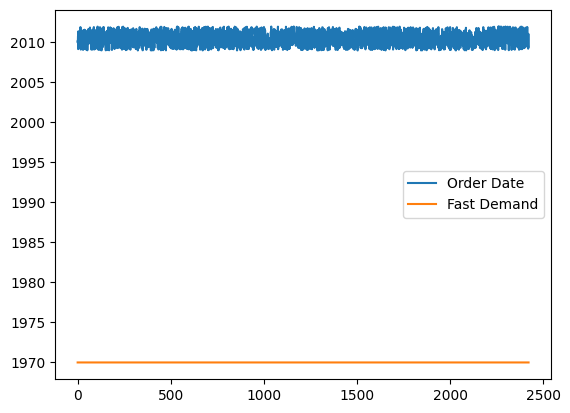

In [34]:
data.plot()

In [35]:
# check for stationary

data.describe()

,Order Date,Fast Demand
count,2421,2421.000000
mean,2010-06-18 10:04:18.736059648,0.891367
min,2009-01-01 00:00:00,0.000000
25%,2009-09-18 00:00:00,1.000000
50%,2010-06-15 00:00:00,1.000000
75%,2011-03-15 00:00:00,1.000000
max,2011-12-31 00:00:00,1.000000
std,NaN,0.311242


(array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2421.],
        [2421.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([    0. ,  1533.9,  3067.8,  4601.7,  6135.6,  7669.5,  9203.4,
        10737.3, 12271.2, 13805.1, 15339. ]),
 <a list of 2 BarContainer objects>)

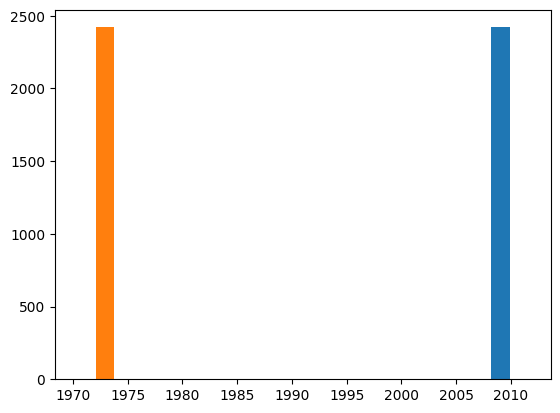

In [36]:
import matplotlib.pyplot as plt

# bimodal (with two peaks)
plt.hist(data)

/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/3541043401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['7_dayMA'] = data['Fast Demand'].rolling(window=7).mean()


<Axes: >

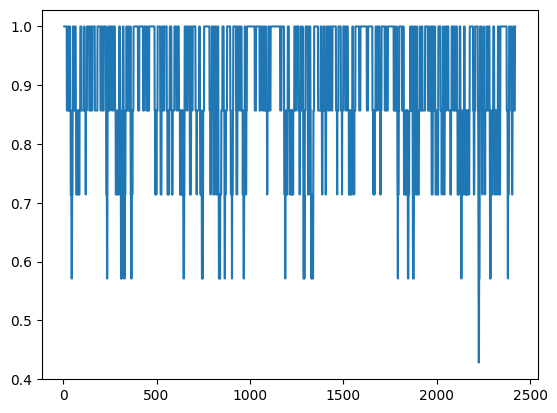

In [39]:
data['7_dayMA'] = data['Fast Demand'].rolling(window=7).mean()
data['7_dayMA'].plot()

In [40]:
data.head(20)

,Order Date,Fast Demand,7_dayMA
0,2010-02-18,1,NaN
1,2009-12-14,1,NaN
2,2010-10-18,1,NaN
3,2009-03-03,1,NaN
4,2011-05-26,1,NaN
5,2009-09-27,1,NaN
6,2010-08-02,1,1.0
7,2011-04-24,1,1.0
8,2009-11-23,1,1.0
9,2010-08-15,1,1.0


/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/1058128823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['30_dayMA'] = data['Fast Demand'].rolling(window=30).mean()


<Axes: >

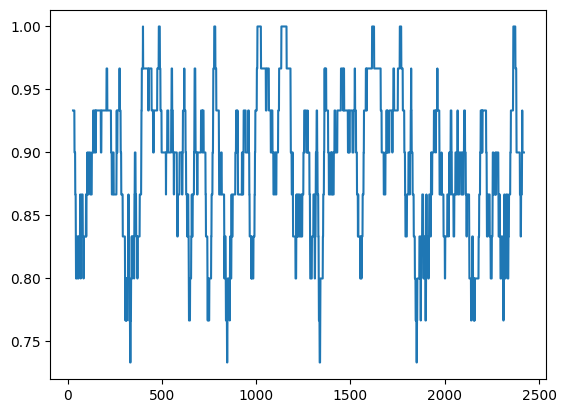

In [41]:
data['30_dayMA'] = data['Fast Demand'].rolling(window=30).mean()
data['30_dayMA'].plot()

In [42]:
data.reset_index(inplace=True)

In [43]:
data

,index,Order Date,Fast Demand,7_dayMA,30_dayMA
0,0,2010-02-18,1,NaN,NaN
1,1,2009-12-14,1,NaN,NaN
2,2,2010-10-18,1,NaN,NaN
3,3,2009-03-03,1,NaN,NaN
4,4,2011-05-26,1,NaN,NaN
...,...,...,...,...,...
2416,2416,2010-07-20,1,0.857143,0.9
2417,2417,2009-06-28,1,0.857143,0.9
2418,2418,2009-03-23,1,0.857143,0.9
2419,2419,2011-01-28,1,1.000000,0.9


In [45]:
import pandas as pd

# Assuming 'data' is your DataFrame and the index is not a datetime object
# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Create the seasonal pivot table
seasonal_df = data.pivot_table(values='Fast Demand', aggfunc='mean', index=data.index.month, columns=data.index.year)


<Axes: >

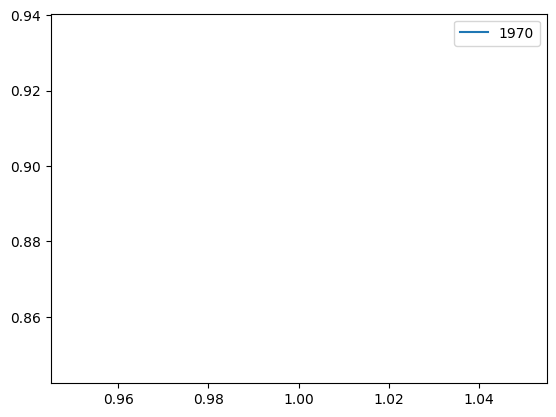

In [46]:
seasonal_df.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 7)'>

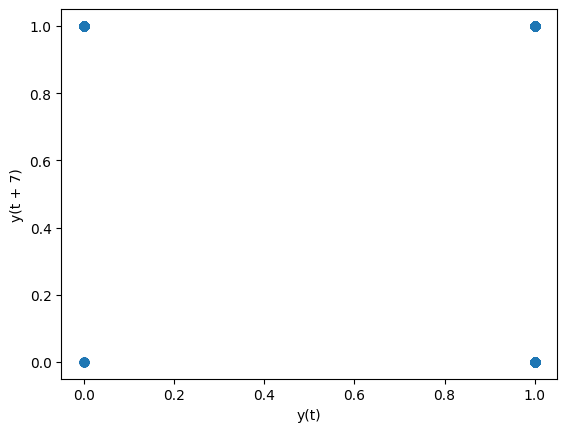

In [47]:
# autocorrelation plot

pd.plotting.lag_plot(data['Fast Demand'], lag=7)

/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/2878792652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['7_day_lag'] = data['Fast Demand'].shift(7)


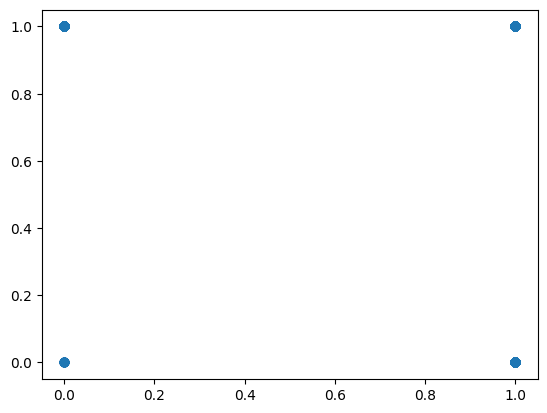

In [48]:
# same can be plot using plt
data['7_day_lag'] = data['Fast Demand'].shift(7)
plt.scatter(data['Fast Demand'], data['7_day_lag'])

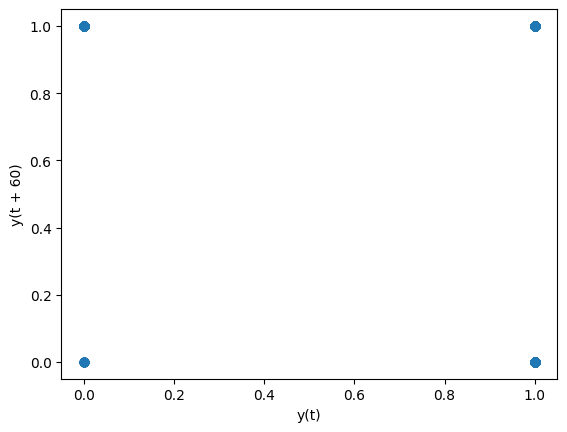

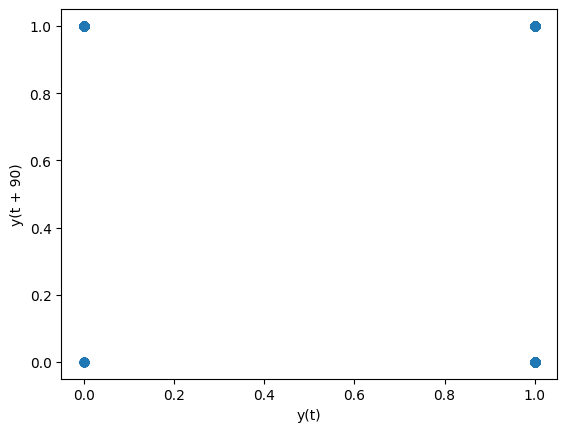

In [50]:
# 90 days is very week, no clear relationship, better relationship if the industry is stable, e.g. banks

pd.plotting.lag_plot(data['Fast Demand'], lag=60)
plt.show()
pd.plotting.lag_plot(data['Fast Demand'], lag=90)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

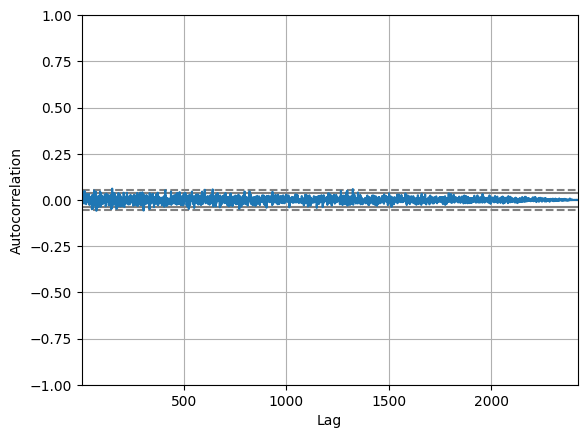

In [51]:
pd.plotting.autocorrelation_plot(data['Fast Demand'])

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [53]:
decomposed = seasonal_decompose(data['Fast Demand'], model = 'additive', period = 365)

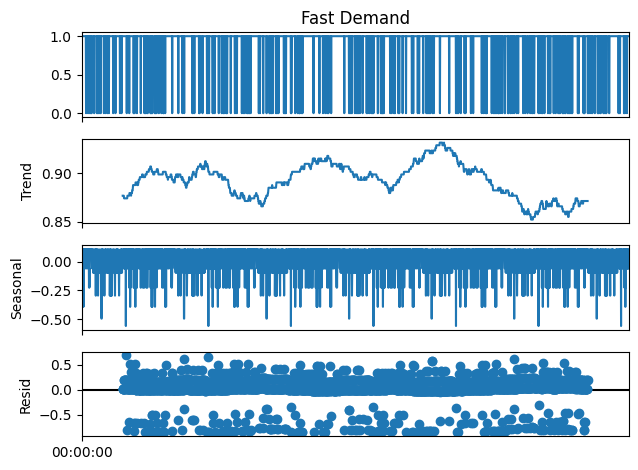

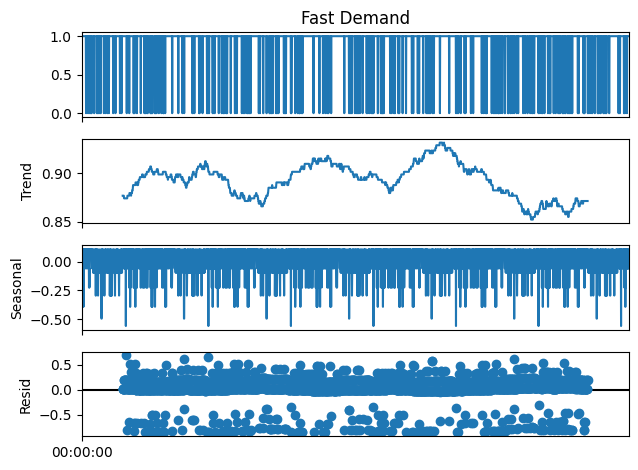

In [54]:
decomposed.plot()

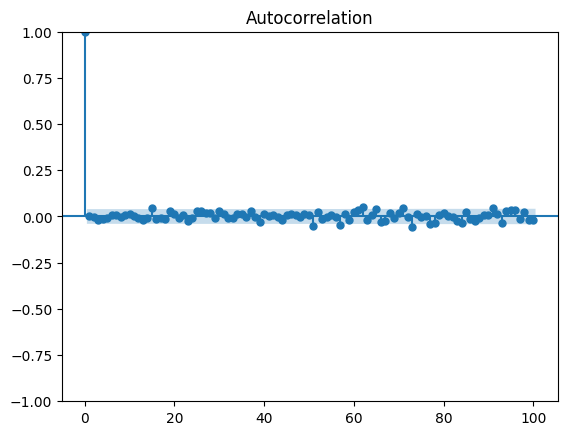

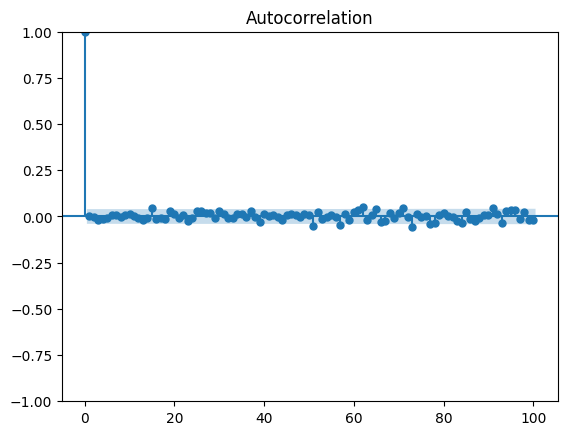

In [55]:
plot_acf(data['Fast Demand'], lags=100)

In [56]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [57]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [58]:
arima_model = auto_arima( df['Fast Demand'], start_p=1, start_q=1, max_p=5
                         , max_q=5
                         , d=None
                         ,trace=True
                         , test='adf'
                         , error_action='ignore'
                         , suppress_warnings=True
                         , stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1225.988, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1221.996, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1223.989, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1223.988, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6594.088, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.647 seconds


In [59]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2421
Model:                        SARIMAX   Log Likelihood                -608.998
Date:                Mon, 11 Dec 2023   AIC                           1221.996
Time:                        11:17:06   BIC                           1233.580
Sample:                             0   HQIC                          1226.209
                               - 2421                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8914      0.000   2443.334      0.000       0.891       0.892
sigma2         0.0968      0.001     65.671      0.000       0.094       0.100
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [60]:
arima_model = auto_arima(data['Fast Demand']
                         , start_p=1
                         , start_q=1
                         , max_p=3
                         , max_q=3
                         , m=12
                         , seasonal = False
                         , d=1
                         , start_P=0
                         , D=0
                         , trace=True
                         , test='adf'
                         , error_action='ignore'
                         , ssuppress_warnings=True
                         , stepwise=True)

/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2895.471, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2208.435, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2893.471, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1947.436, Time=0.74 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1793.867, Time=0.91 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1791.867, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1945.436, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=3.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=1.88 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 25.726 seconds


In [61]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2421
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -891.933
Date:                Mon, 11 Dec 2023   AIC                           1791.867
Time:                        11:19:36   BIC                           1815.033
Sample:                    01-01-1970   HQIC                          1800.291
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7375      0.018    -40.832      0.000      -0.773      -0.702
ar.L2         -0.4848      0.021    -23.343      0.000      -0.526      -0.444
ar.L3         -0.2494      0.018    -13.704      0.0

In [62]:
arima_model.predict(n_periods=180)

1970-01-01 00:00:00.000002421    1.0
1970-01-01 00:00:00.000002422    1.0
1970-01-01 00:00:00.000002423    1.0
1970-01-01 00:00:00.000002424    1.0
1970-01-01 00:00:00.000002425    1.0
                                ... 
1970-01-01 00:00:00.000002596    1.0
1970-01-01 00:00:00.000002597    1.0
1970-01-01 00:00:00.000002598    1.0
1970-01-01 00:00:00.000002599    1.0
1970-01-01 00:00:00.000002600    1.0
Freq: N, Length: 180, dtype: float64

In [63]:
data['30_day_lag'] = data['Fast Demand'].shift(30)

/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/2362294868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['30_day_lag'] = data['Fast Demand'].shift(30)


In [64]:
data = data[['7_day_lag','30_day_lag','Fast Demand']].dropna()

In [65]:
data

,7_day_lag,30_day_lag,Fast Demand
1970-01-01 00:00:00.000000030,1.0,1.0,1
1970-01-01 00:00:00.000000031,1.0,1.0,1
1970-01-01 00:00:00.000000032,1.0,1.0,1
1970-01-01 00:00:00.000000033,1.0,1.0,1
1970-01-01 00:00:00.000000034,1.0,1.0,1
...,...,...,...
1970-01-01 00:00:00.000002416,1.0,1.0,1
1970-01-01 00:00:00.000002417,1.0,1.0,1
1970-01-01 00:00:00.000002418,1.0,1.0,1
1970-01-01 00:00:00.000002419,0.0,1.0,1


In [66]:
y = data['Fast Demand']
X = data[['7_day_lag','30_day_lag']]

In [67]:
len(X)

2391

In [68]:
x_train, x_test = X.iloc[:1500], X.iloc[1500:]
y_train, y_test = y.iloc[:1500], y.iloc[1500:]

In [69]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=50)

In [70]:
pred = rf_model.predict(x_test)

In [71]:
import numpy as np
np.sqrt(mean_squared_error(pred, y_test))

0.32040689566458275